In [36]:
# Importing the Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data
df = pd.read_excel('nba_player_data.xlsx')

# Data Cleaning
df.drop(columns=['RANK'], inplace=True)
df['season_start_year'] = df['Year'].str[:4].astype(int)
df['TEAM'] = df['TEAM'].replace(to_replace=['NOP','NOH'], value='NO')
df['Season_type'] = df['Season_type'].replace('Regular%20Season','Regular Season')

In [37]:
# Create PPG column
df['PPG'] = df['PTS'] / df['GP']

# Filter for only regular season data
df_rs = df[df['Season_type'] == 'Regular Season']

In [38]:
# Filter for players with at least 10 PPG
df_rs_10 = df_rs[df_rs['PPG'] >= 10].copy()

In [39]:
# Set value for number of top scorers to display in visualization
top_scorers = 20

# Create dataframe for the top scorers based on PPG and FG%
df_ppg = df_rs_10[['PLAYER', 'Year', 'PPG', 'FG_PCT', 'Year']].sort_values(by='PPG', ascending=False).head(top_scorers)

# Create dataframe for the most efficient scorers among players with at least 10 PPG
df_eff = df_rs_10[['PLAYER', 'Year', 'PPG', 'FG_PCT', 'Year']].sort_values(by='FG_PCT', ascending=False).head(top_scorers)

In [40]:
df_eff

,PLAYER,Year,PPG,FG_PCT,Year
2822,DeAndre Jordan,2016-17,12.703704,0.714,2016-17
6544,Rudy Gobert,2021-22,15.560606,0.713,2021-22
1442,DeAndre Jordan,2014-15,11.536585,0.710,2014-15
2141,DeAndre Jordan,2015-16,12.727273,0.703,2015-16
5006,Rudy Gobert,2019-20,15.088235,0.693,2019-20
6568,Jarrett Allen,2021-22,16.142857,0.677,2021-22
789,DeAndre Jordan,2013-14,10.439024,0.676,2013-14
5748,Rudy Gobert,2020-21,14.295775,0.675,2020-21
4252,Rudy Gobert,2018-19,15.851852,0.669,2018-19
6974,Cameron Oliver,2021-22,11.500000,0.667,2021-22


([Text(35.91061709311313, 0.44447619047619047, 'James Harden'),
  Text(34.774881553727944, 0.4495238095238095, 'James Harden'),
  Text(32.54905670645, 0.5060476190476191, 'Kevin Durant'),
  Text(32.70984923968299, 0.48048511904761904, 'Stephen Curry'),
  Text(32.37470052481565, 0.42747619047619045, 'Russell Westbrook'),
  Text(31.841764803590554, 0.48728571428571427, 'Bradley Beal'),
  Text(31.06981022997919, 0.49785714285714283, 'Joel Embiid'),
  Text(31.08562445271336, 0.4562380952380952, 'Bradley Beal'),
  Text(31.158299321572724, 0.4486190476190476, 'James Harden'),
  Text(30.863191973668407, 0.527047619047619, 'LeBron James'),
  Text(30.675808808971617, 0.5028660714285714, 'Stephen Curry'),
  Text(30.675204120641386, 0.46604761904761904, 'Damian Lillard'),
  Text(30.982320216256916, 0.5524419642857143, 'Giannis Antetokounmpo'),
  Text(30.40943830016493, 0.521047619047619, 'Kevin Durant'),
  Text(30.605679865150712, 0.43471428571428566, 'Trae Young'),
  Text(30.28681617111515, 0.55

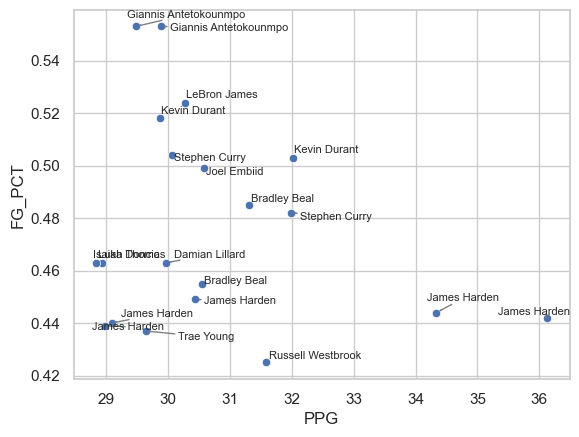

In [42]:
from adjustText import adjust_text

sns.set_theme(style='whitegrid')

sns.scatterplot(data = df_ppg, x='PPG', y='FG_PCT')

texts = []
for i, txt in enumerate(df_ppg.index):
    texts.append(plt.text(df_ppg['PPG'].iloc[i], df_ppg['FG_PCT'].iloc[i], df_ppg['PLAYER'].iloc[i], fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))